# Introduction

In this Python notebook, we are going to take a look at a fundamental machine learning model known as K-Means Clustering. K-Means Clustering is an **unsupervised** learning method. This means that the model has no intel as to how the data points is labeled. Instead, this model works on creating different clusters which will then be used to help classify the data. This is different than K-Nearest Neighbor (KNN) due to the fact that KNN is supervised and this isn't.

## Importing Libraries

To begin, we of course begin by importing the necessary libraries.

In [21]:
import pandas as pd # Used to create dataframes
import matplotlib.pyplot as plt # Used to create plots
from sklearn import cluster, datasets # Used to import the K-means clustering model as well as an example dataset to use

## Importing Data

We will now import the iris dataset popular amongst tuorial due to how easily accessibly and ready it is. To load the dataframe we simply load it in through the dataframes library. We can then check the length of the data to determine how different values we are working with, in this case, 150.

In [2]:
iris = datasets.load_iris()

In [3]:
print(len(iris['data']))

150


We can also take a look at more specific characteristics of the data such as the feature names and the target names.

In [4]:
print(iris['feature_names'][0:5], iris['data'][0:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
print(iris['target_names'][0:5], iris['target'][0:5])

['setosa' 'versicolor' 'virginica'] [0 0 0 0 0]


## Splitting The Data

There are many tutorials that split the data but very few explain why. The reason for why I am splitting the data into two columns is simply due to visualization purposes. In the real world, splitting the data may not be optimal and may lead to a worse model. Splitting the data into two columns allows us to create an intuitive plot that would otherwise be impossible to display if more features were included. Another small detail to note is that we are creating a new variable, X, which will house the split data instead of replacing the original dataset.

In [6]:
X = iris.data[:, :2]

In this step, we are simply placing the target results into a different variable so that we can verify our results later on.

In [7]:
y = iris.target

## Creating a DataFrame

At this point it is a good idea to create a dataframe to neatly organize the data that we have to work with. Pandas makes it very easy to create these dataframes in addition to making it easy to manipulate the dataframe to fulfill our needs.

In [8]:
df = pd.DataFrame(X, columns = ['sepal length (cm)', 'sepal width (cm)'])
df['Target'] = y

In [9]:
df.head()

,sepal length (cm),sepal width (cm),Target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


## Visualization

Up until this point, a lot of the previous steps looked very similar to that of KNN. It is at this point that we are going to begin to deviate. It is important to remember that this is an unsupervised model. We do not know which data point corresponds to which type of iris. Instead when we try to visualize the plot, we are met with something that looks like the following.

Text(0.5, 1.0, 'Sepal Length Compared to Sepal Width')

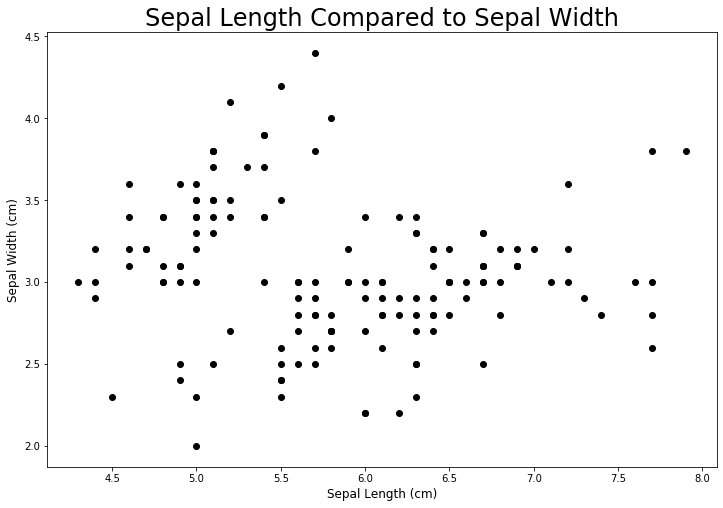

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], color = 'black')
plt.xlabel('Sepal Length (cm)', size = 12)
plt.ylabel('Sepal Width (cm)', size = 12)
plt.title('Sepal Length Compared to Sepal Width', size = 24)

## K-Means

The data does not seem to offer any valueable pieces of information at a glance. The values seem to be randomly scattered about. It is now time to import the K-means model in hopes that it can make out some sort of pattern within the data.

The way it does this is by selecting random locations to place down "centroids". These centroids will take a look at the nearest data points and essentially "recruit" it and give the datapoint a label based on the respective centroid. The amount of centroids is dependendent on a value K (hence the name K-Means) and this value can be adjusted on a case-by-case basis. Once all datapoints are associated with a centroid, the model then takes the average location of each datapoint and then moves the ccentroid to the average location. At the new location, the centroids repeat the process of collecting the nearest values. The model continues to iterate until the number of associated values per centroid remains the same accross two consecutive iterations, or, if the max amount of iterations is reached. These values can be changed when importing the model.

In [11]:
kmeans = cluster.KMeans(
    init = 'random',
    n_clusters = 3,
    n_init = 10,
    max_iter = 1000
)

In [12]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now that the model has been trained we can have it create clusters. Once it does that, we can print out the values and see how the model has decided to cluster the data.

In [13]:
predictions = kmeans.predict(X)

In [14]:
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [15]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
df['Predicted'] = predictions

At this point we can add a new column to our dataframe that houses the clusters that we have created. It is important to realize that the job of the K-means model is to create groups, classification will come later.

In [17]:
df.head()

,sepal length (cm),sepal width (cm),Target,Predicted
0,5.1,3.5,0,1
1,4.9,3.0,0,1
2,4.7,3.2,0,1
3,4.6,3.1,0,1
4,5.0,3.6,0,1


## Viewing The Results

Now that we have the values assigned to a cluster. We are able to view the clusters on the graph. Note that the legend doesn't specify which type of plant is which. Keep in mind that we are only creating the clusters right now and not doing classification.

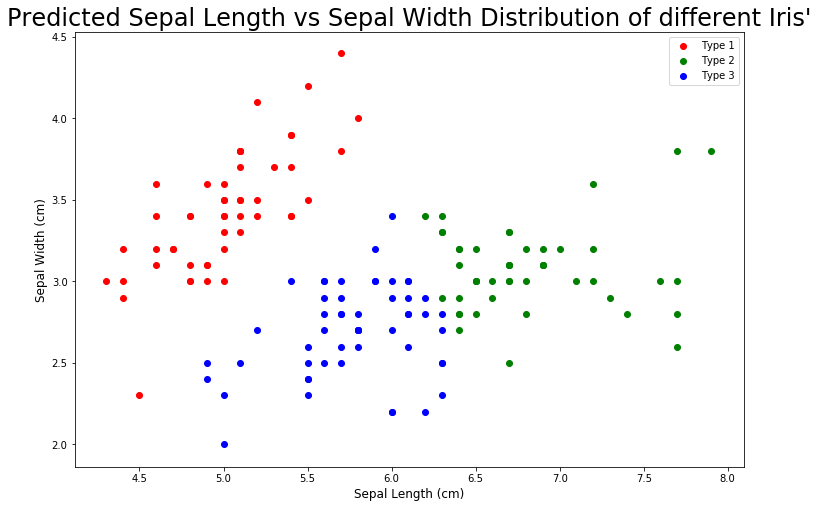

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

setosa_label = False
versicolor_label = False
virginica_label = False

for i in df.iterrows():
    if i[1]['Predicted'] == 0.0:
        if setosa_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue', label = 'Type 3')
            setosa_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue')
    elif i[1]['Predicted'] == 1.0:
        if versicolor_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red', label = 'Type 1')
            versicolor_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red')
    else:
        if virginica_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'green', label = 'Type 2')
            virginica_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'green')
plt.xlabel('Sepal Length (cm)', size = 12)
plt.ylabel('Sepal Width (cm)', size = 12)
plt.title('Predicted Sepal Length vs Sepal Width Distribution of different Iris\'', size = 24)
plt.legend()

Those values look pretty good! Since we already know what the iris distribution is supposed to look like, we can create subplots and place the predicted clusters next to the actual clusters to determine how accurate our model is.

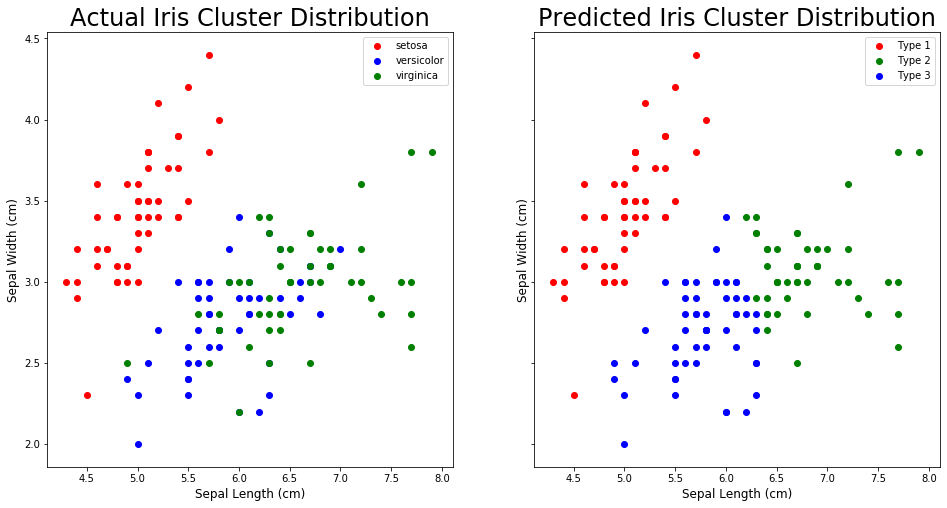

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (16, 8), sharey = True)

setosa_label = False
versicolor_label = False
virginica_label = False

for i in df.iterrows():
    if i[1]['Predicted'] == 0.0:
        if setosa_label == False:
            ax[1].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue', label = 'Type 3')
            setosa_label = True
        else:
            ax[1].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue')
    elif i[1]['Predicted'] == 1.0:
        if versicolor_label == False:
            ax[1].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red', label = 'Type 1')
            versicolor_label = True
        else:
            ax[1].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red')
    else:
        if virginica_label == False:
            ax[1].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'green', label = 'Type 2')
            virginica_label = True
        else:
            ax[1].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'green')

setosa_label = False
versicolor_label = False
virginica_label = False

for i in df.iterrows():
    if i[1]['Target'] == 0.0:
        if setosa_label == False:
            ax[0].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red', label = 'setosa')
            setosa_label = True
        else:
            ax[0].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red')
    elif i[1]['Target'] == 1.0:
        if versicolor_label == False:
            ax[0].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue', label = 'versicolor')
            versicolor_label = True
        else:
            ax[0].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue')
    else:
        if virginica_label == False:
            ax[0].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'green', label = 'virginica')
            virginica_label = True
        else:
            ax[0].scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'green')

plt.tight_layout
ax[0].set_title('Actual Iris Cluster Distribution', size = 24)
ax[1].set_title('Predicted Iris Cluster Distribution', size = 24)
ax[0].set_xlabel('Sepal Length (cm)', size = 12)
ax[1].set_xlabel('Sepal Length (cm)', size = 12)
ax[0].set_ylabel('Sepal Width (cm)', size = 12)
ax[1].set_ylabel('Sepal Width (cm)', size = 12)
ax[0].legend()
ax[1].legend()

# Conclusion

The model seems to be pretty accurate with a few misclassifications here and there, espeecially in the area where veriscolor and virginica overlap. This is a great starting point. Feel free to tinker with the settings and see how good you can make the model. For a first pass though, this is very good. This goes to show the power of K-Means and why it is helpful.